In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [4]:
df = pd.read_csv('concatdata.csv')
df['Emotion'].value_counts()

love         7684
sadness      7482
happiness    5209
anger        2369
joy          2326
neutral      2254
fear         2171
Name: Emotion, dtype: int64

In [5]:
df['Emotion'] = df['Emotion'].replace('joy','happiness')
df['Emotion'].value_counts()

love         7684
happiness    7535
sadness      7482
anger        2369
neutral      2254
fear         2171
Name: Emotion, dtype: int64

In [6]:
from textblob import TextBlob

In [7]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result ='positive'
    elif sentiment<0:
        result ='negative'
    else:
        result = 'neutral'
    return result

In [8]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [9]:
df.groupby(['Emotion','Sentiment']).size()

Emotion    Sentiment
anger      negative      959
           neutral       840
           positive      570
fear       negative      771
           neutral       739
           positive      661
happiness  negative      566
           neutral      1878
           positive     5091
love       negative      428
           neutral      1368
           positive     5888
neutral    negative      178
           neutral      1523
           positive      553
sadness    negative     2853
           neutral      2481
           positive     2148
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

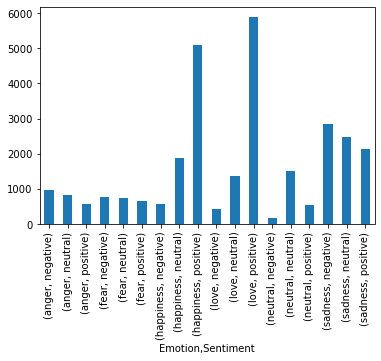

In [10]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [11]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [12]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [13]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [14]:
df['Clean_Text']

0                                                   agreed
1          correct ADORE him plucked arm cuz cryin bett...
2          sounds good Appreciate suggestion week were ...
3        Pats philly 2 am love it Mmm cheesesteak Miss ...
4              thanks neemah Im gonna soooo close izzy far
                               ...                        
29490                 going watch boy striped pjs hope cry
29491    gave bikes thorough wash degrease grease it th...
29492                  AMAZING time night McFly INCREDIBLE
29493                          Succesfully following Tayla
29494      WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SING...
Name: Clean_Text, Length: 29495, dtype: object

In [15]:
from collections import Counter

In [16]:
def extract_keywords(text,num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [17]:
emotion_list = df['Emotion'].unique().tolist()

In [18]:
joy_list = df[df["Emotion"] == 'joy']['Clean_Text'].tolist()
neutral_list = df[df["Emotion"] == 'neutral']['Clean_Text'].tolist()
worry_list = df[df["Emotion"] == 'worry']['Clean_Text'].tolist()
sadness_list = df[df["Emotion"] == 'sadness']['Clean_Text'].tolist()
happiness_list = df[df["Emotion"] == 'happiness']['Clean_Text'].tolist()
anger_list = df[df["Emotion"] == 'anger']['Clean_Text'].tolist()
surprise_list = df[df["Emotion"] == 'surprise']['Clean_Text'].tolist()
fear_list = df[df["Emotion"] == 'fear']['Clean_Text'].tolist()
fun_list = df[df["Emotion"] == 'fun']['Clean_Text'].tolist()
relief_list = df[df["Emotion"] == 'relief']['Clean_Text'].tolist()
hate_list = df[df["Emotion"] == 'hate']['Clean_Text'].tolist()
empty_list = df[df["Emotion"] == 'empty']['Clean_Text'].tolist()
enthusiasm_list = df[df["Emotion"] == 'enthusiasm']['Clean_Text'].tolist()
boredom_list = df[df["Emotion"] == 'boredom']['Clean_Text'].tolist()

In [19]:
joy_docx = ' '.join(joy_list)
neutral_docx = ' '.join(neutral_list)
worry_docx = ' '.join(worry_list)
sadness_docx = ' '.join(sadness_list)
happiness_docx = ' '.join(happiness_list)
anger_docx = ' '.join(anger_list)
surprise_docx = ' '.join(surprise_list)
fear_docx = ' '.join(fear_list)
fun_docx = ' '.join(fun_list)
relief_docx = ' '.join(relief_list)
hate_docx = ' '.join(hate_list)
empty_docx = ' '.join(empty_list)
enthusiasm_docx = ' '.join(enthusiasm_list)
boredom_docx = ' '.join(boredom_list)

In [20]:
from sklearn.model_selection import train_test_split

#ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [21]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [22]:
#Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [23]:
#Get Features by Name
cv.get_feature_names()

C:\Users\zohai\Projects\Loneliness\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '00am',
 '01',
 '03',
 '04',
 '04182012154',
 '05',
 '06',
 '0600',
 '06am',
 '07',
 '079ï',
 '07k6x',
 '07kbp',
 '07xoh',
 '07yez',
 '08',
 '08kaifj',
 '09',
 '0egwanj',
 '0f',
 '0guyoj',
 '0o',
 '0s',
 '0xhu5j',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100greatestgames',
 '100msg',
 '100th',
 '100word',
 '100x',
 '101',
 '1010',
 '102',
 '103',
 '1030',
 '1030pm',
 '104',
 '1045',
 '105',
 '106',
 '1073',
 '108',
 '109',
 '1095',
 '10am',
 '10dolla',
 '10gb',
 '10k',
 '10mm',
 '10p',
 '10pm',
 '10th',
 '10ty',
 '10uemq',
 '10year',
 '10yr',
 '11',
 '110',
 '1102',
 '110km',
 '1116',
 '112',
 '1123',
 '113',
 '114',
 '1140',
 '115',
 '11830',
 '118lgl',
 '11dd2t',
 '11months',
 '11stupid',
 '12',
 '120',
 '120mm',
 '121',
 '1215',
 '121908inlove',
 '122',
 '123',
 '1230',
 '1230pm',
 '12521260',
 '12am',
 '12f0y',
 '12ghz',
 '12s',
 '12st',
 '12th',
 '12yearold',
 '12yr',
 '13',
 '131',
 '13341015518',
 '135',
 '13576',
 '13gigs',
 '13izrj',
 '13quot',
 '13th',
 

In [24]:
#X.toarray()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [26]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [27]:
nv_model.score(X_test,y_test)

0.5828907221154933

In [28]:
#Predictions
y_pred_for_nv = nv_model.predict(X_test)

In [29]:
y_pred_for_nv

array(['sadness', 'sadness', 'happiness', ..., 'love', 'sadness', 'love'],
      dtype='<U9')

In [30]:
sample_text = ["I love reading so much"]

In [31]:
vect = cv.transform(sample_text).toarray()

In [32]:
#Make Predic
nv_model.predict(vect)

array(['love'], dtype='<U9')

In [33]:
def predict_emotion(sample_text,model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_,pred_proba[0]))
    print(prediction[0])
    return pred_percentage_for_all


In [34]:
predict_emotion(sample_text,nv_model)

love


{'anger': 0.00033943670045338,
 'fear': 0.0004486314402461869,
 'happiness': 0.10110267493927991,
 'love': 0.879597017656882,
 'neutral': 5.714281309423808e-06,
 'sadness': 0.01850652498182792}

In [35]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [36]:
lr_model.score(X_test,y_test)

0.6578144423098655

In [37]:
predict_emotion(sample_text,lr_model)

love


{'anger': 0.010442014519918608,
 'fear': 0.011861753548141209,
 'happiness': 0.3156469605083478,
 'love': 0.6396369236597008,
 'neutral': 0.0026930822230356198,
 'sadness': 0.019719265540856016}

In [38]:
import joblib
model_file = open('emotion_classifier_nv_model_3_september.pkl',"wb")
joblib.dump(nv_model,model_file)
model_file.close()
model_file = open('emotion_classifier_lr_model_3_september.pkl',"wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [39]:
predict_emotion(["My dog just died"],lr_model)

sadness


{'anger': 0.0024685461389498025,
 'fear': 0.016263814727135933,
 'happiness': 0.008884201091661235,
 'love': 0.005910641554879266,
 'neutral': 0.009861148182234006,
 'sadness': 0.9566116483051397}

In [40]:
predict_emotion(["feeling isolate group couples  sometimes feel sort not know i am own  time seem drag "],lr_model)

sadness


{'anger': 0.03442452178623646,
 'fear': 0.014127638570367801,
 'happiness': 0.01839778037261564,
 'love': 0.0030362747943891146,
 'neutral': 0.0008017938925137733,
 'sadness': 0.9292119905838773}

In [41]:
predict_emotion(["I love coding very much"],lr_model)

love


{'anger': 0.005311907906830887,
 'fear': 0.014255941484808849,
 'happiness': 0.23559111416973197,
 'love': 0.6816130961917338,
 'neutral': 0.012882629161125673,
 'sadness': 0.05034531108576857}

In [42]:
predict_emotion(['I had an amazing dinner tonight'],lr_model)

happiness


{'anger': 0.002542468123894763,
 'fear': 0.002403384116136519,
 'happiness': 0.6724938335383868,
 'love': 0.27168065853421763,
 'neutral': 0.006648158588095463,
 'sadness': 0.04423149709926888}